In [143]:
import pandas as pd
import rebound
import numpy as np

df = pd.read_csv("../datanonresOLD.csv", index_col=0)
df.tail()

,filename,tinstability
195,nonresIC195.bin,NaN
196,nonresIC196.bin,NaN
197,nonresIC197.bin,NaN
198,nonresIC198.bin,NaN
199,nonresIC199.bin,NaN


In [144]:
def instability_time(row):
    sim = rebound.Simulation.from_archive('data/'+row['filename'])
    row['tinstability'] = sim.t
    return row

In [145]:
df = df.apply(instability_time, axis=1)

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulation.py:374: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


In [149]:
df[df['tinstability'] == 0] = 1.e3

(array([ 63.,  14.,  15.,   4.,   5.,   7.,   7.,  12.,  13.,  60.]),
 array([ 3.        ,  3.36893977,  3.73787953,  4.1068193 ,  4.47575907,
         4.84469883,  5.2136386 ,  5.58257836,  5.95151813,  6.3204579 ,
         6.68939766]),
 <a list of 10 Patch objects>)

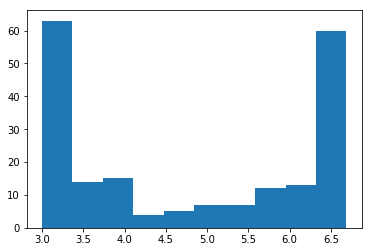

In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(np.log10(df['tinstability']))

In [124]:
sa = rebound.SimulationArchive('data/nonresIC3.bin')    

In [125]:
sa.Nblob

0

In [126]:
sim = sa[0]
sim.simulationarchive_filename = 'data/nonresIC3.bin'.encode('ascii')

In [127]:
sim.simulationarchive_interval

1000.0

In [128]:
try:
    sim.integrate(2000.)
except:
    print(sim.t)
    sim._status = 5

In [129]:
sim._status

0

In [33]:
sim = sa[-1]

In [34]:
sim.t

2000.0

In [60]:
for p in sim.particles[1:]:
    print(p.orbit)

<rebound.Orbit instance, a=0.011103668813643549 e=0.03963888835628231 inc=0.007994348801123452 Omega=2.661901610522322 omega=0.08753992589310647 f=1.3088308647987754>
<rebound.Orbit instance, a=0.015208564580519184 e=0.10562583230654896 inc=0.004258620622920448 Omega=-0.46749010908432126 omega=1.0149396447938879 f=-0.10111681856064969>
<rebound.Orbit instance, a=0.02142580377213573 e=0.05229276756051617 inc=0.005295117632687401 Omega=0.7431401348347825 omega=0.15757513434962936 f=-3.163158217403545>
<rebound.Orbit instance, a=0.0281535130225398 e=0.0643616295582703 inc=0.0038688376562144855 Omega=-2.402467026759876 omega=-0.004407655756657104 f=-0.03039977306606281>
<rebound.Orbit instance, a=0.03704542771234212 e=0.011912119367469037 inc=0.005677001259747399 Omega=-1.8998392270992728 omega=-0.19392725027571764 f=2.472174275833979>
<rebound.Orbit instance, a=0.04506067758093497 e=0.030369196133735604 inc=0.005340592317166022 Omega=2.7558145850931806 omega=-2.114648129527263 f=-0.714215

In [35]:
sim = rebound.Simulation.from_archive('data/nonresIC1.bin')    

/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulation.py:374: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


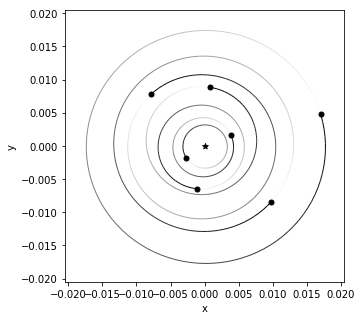

In [37]:
%matplotlib inline
rebound.OrbitPlot(sim);